<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n250.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.766812,0.735479,31.502291,30.441602,1.060689
1,0.0,1.0,20.522665,1.478480,32.001145,30.191103,1.810042
2,0.0,2.0,81.301506,0.663178,91.964684,92.551318,-0.586634
3,0.0,3.0,69.448000,1.316236,80.764236,80.389403,0.374834
4,0.0,4.0,72.600200,0.165142,82.765342,83.623618,-0.858276
...,...,...,...,...,...,...,...
19995,999.0,15.0,96.368613,2.442437,108.811050,106.878749,1.932301
19996,999.0,16.0,23.480316,-0.846975,32.633341,33.609406,-0.976064
19997,999.0,17.0,20.448037,0.787435,31.235472,30.561274,0.674198
19998,999.0,18.0,55.631886,2.079129,67.711015,65.929058,1.781957


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.766812,0.735479,31.502291,30.441602,1.060689
1,0.0,1.0,20.522665,1.478480,32.001145,30.191103,1.810042
2,0.0,2.0,81.301506,0.663178,91.964684,92.551318,-0.586634
3,0.0,3.0,69.448000,1.316236,80.764236,80.389403,0.374834
4,0.0,4.0,72.600200,0.165142,82.765342,83.623618,-0.858276
...,...,...,...,...,...,...,...
19995,999.0,15.0,96.368613,2.442437,108.811050,106.878749,1.932301
19996,999.0,16.0,23.480316,-0.846975,32.633341,33.609406,-0.976064
19997,999.0,17.0,20.448037,0.787435,31.235472,30.561274,0.674198
19998,999.0,18.0,55.631886,2.079129,67.711015,65.929058,1.781957


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    20.766812  0.735479   31.502291   30.441602  1.060689
      1.0    20.522665  1.478480   32.001145   30.191103  1.810042
      2.0    81.301506  0.663178   91.964684   92.551318 -0.586634
      3.0    69.448000  1.316236   80.764236   80.389403  0.374834
      4.0    72.600200  0.165142   82.765342   83.623618 -0.858276
...                ...       ...         ...         ...       ...
999.0 15.0   96.368613  2.442437  108.811050  106.878749  1.932301
      16.0   23.480316 -0.846975   32.633341   33.609406 -0.976064
      17.0   20.448037  0.787435   31.235472   30.561274  0.674198
      18.0   55.631886  2.079129   67.711015   65.929058  1.781957
      19.0   96.235127  1.986627  108.221753  106.744565  1.477188

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    20.766812  0.735479   31.502291   30.441602  1.060689
      1.0    20.522665  1.478480   32.001145   30.191103  1.810042
      2.0    81.301506  0.663178   91.964684   92.551318 -0.586634
      3.0    69.448000  1.316236   80.764236   80.389403  0.374834
      4.0    72.600200  0.165142   82.765342   83.623618 -0.858276
...                ...       ...         ...         ...       ...
999.0 15.0   96.368613  2.442437  108.811050  106.878749  1.932301
      16.0   23.480316 -0.846975   32.633341   33.609406 -0.976064
      17.0   20.448037  0.787435   31.235472   30.561274  0.674198
      18.0   55.631886  2.079129   67.711015   65.929058  1.781957
      19.0   96.235127  1.986627  108.221753  106.744565  1.477188

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.766812,0.735479,31.502291,30.441602,1.060689
1,0.0,1.0,20.522665,1.478480,32.001145,30.191103,1.810042
2,0.0,2.0,81.301506,0.663178,91.964684,92.551318,-0.586634
3,0.0,3.0,69.448000,1.316236,80.764236,80.389403,0.374834
4,0.0,4.0,72.600200,0.165142,82.765342,83.623618,-0.858276
...,...,...,...,...,...,...,...
19995,999.0,15.0,96.368613,2.442437,108.811050,106.878749,1.932301
19996,999.0,16.0,23.480316,-0.846975,32.633341,33.609406,-0.976064
19997,999.0,17.0,20.448037,0.787435,31.235472,30.561274,0.674198
19998,999.0,18.0,55.631886,2.079129,67.711015,65.929058,1.781957


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    20.766812  0.735479   31.502291   30.441602  1.060689
      1.0    20.522665  1.478480   32.001145   30.191103  1.810042
      2.0    81.301506  0.663178   91.964684   92.551318 -0.586634
      3.0    69.448000  1.316236   80.764236   80.389403  0.374834
      4.0    72.600200  0.165142   82.765342   83.623618 -0.858276
...                ...       ...         ...         ...       ...
999.0 15.0   96.368613  2.442437  108.811050  106.878749  1.932301
      16.0   23.480316 -0.846975   32.633341   33.609406 -0.976064
      17.0   20.448037  0.787435   31.235472   30.561274  0.674198
      18.0   55.631886  2.079129   67.711015   65.929058  1.781957
      19.0   96.235127  1.986627  108.221753  106.744565  1.477188

[20000 rows x 5 columns]

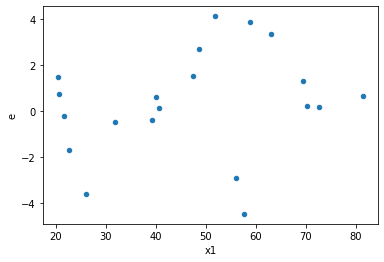

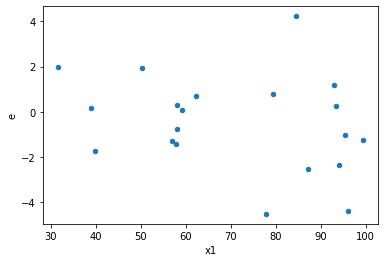

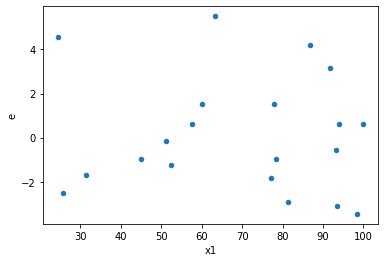

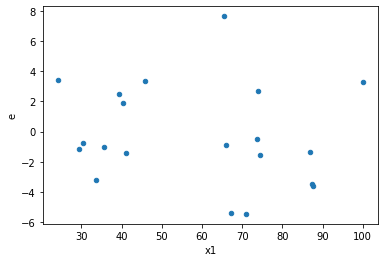

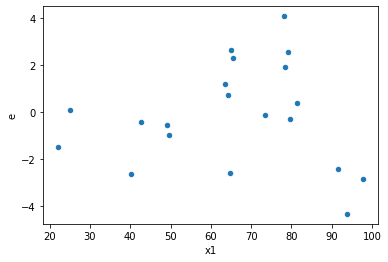

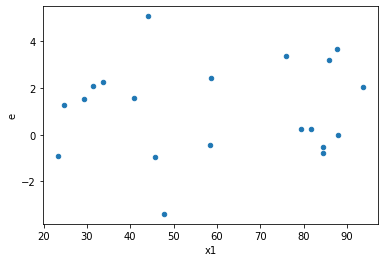

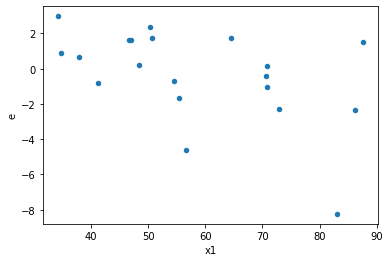

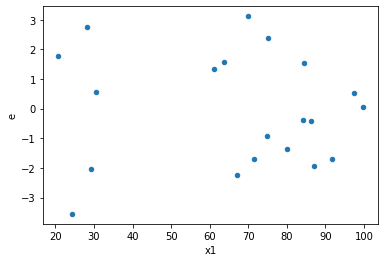

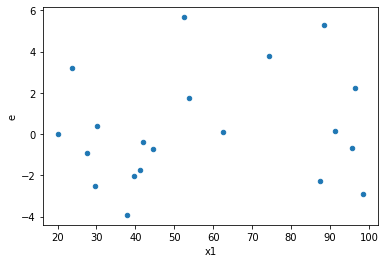

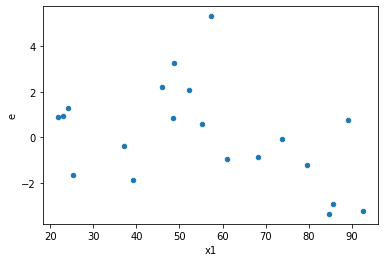

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,17.76519910077619,52.67837362382079,2.53788558582517,7.525481946260113,2.965256585360712,0.17485005411574206,0.912574972942129,0.08742502705787103,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,12.617233720024732,35.098860752693696,1.8024619600035332,5.014122964670528,2.7818190208356457,0.20047249533398093,0.8997637523330095,0.10023624766699046,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,35.117780911985804,58.06551494385778,5.016825844569401,8.295073563408254,1.653450572215394,0.5229816878950773,0.7385091560524614,0.26149084394753863,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,36.03247208106953,58.08243694798053,5.147496011581361,8.297490992568648,1.6119470464668855,0.5440094909089099,0.727995254545545,0.27200474545445497,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,7.4584859635277745,12.64113293203431,1.065497994789682,1.8058761331477586,1.694865820469441,0.5029557049250057,0.7485221475374971,0.25147785246250287,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,10.340239599338318,59.71236093421885,1.4771770856197597,8.53033727631698,5.77475602577332,0.03398799513736517,0.9830060024313174,0.016993997568682584,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,18.400387040001455,53.63318282453384,2.628626720000208,7.661883260647691,2.914785580756436,0.18146742264089943,0.9092662886795503,0.09073371132044972,Reject001=1 : Homoscedasticity
10.0,7.0,7.0,22.301740498584362,54.14045570882815,3.1859629283691944,7.734350815546878,2.427633650937011,0.2647879302804168,0.8676060348597916,0.1323939651402084,Reject001=1 : Homoscedasticity
12.0,7.0,7.0,4.525731812381606,61.561262697128306,0.6465331160545151,8.794466099589759,13.602499054121486,0.0027312032200723646,0.9986343983899638,0.0013656016100361823,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,17.76519910077619,52.67837362382079,2.53788558582517,7.525481946260113,2.965256585360712,0.17485005411574206,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,12.617233720024732,35.098860752693696,1.8024619600035332,5.014122964670528,2.7818190208356457,0.20047249533398093,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,35.117780911985804,58.06551494385778,5.016825844569401,8.295073563408254,1.653450572215394,0.5229816878950773,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,36.03247208106953,58.08243694798053,5.147496011581361,8.297490992568648,1.6119470464668855,0.5440094909089099,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,7.4584859635277745,12.64113293203431,1.065497994789682,1.8058761331477586,1.694865820469441,0.5029557049250057,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,23.40081154184081,16.45602291122368,3.34297307740583,2.3508604158890973,0.7032244536391484,0.6538929455972656,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,10.340239599338318,59.71236093421885,1.4771770856197597,8.53033727631698,5.77475602577332,0.03398799513736517,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,37.16263675014633,9.329313097000874,5.308948107163762,1.3327590138572678,0.25104012828056765,0.08851360461540565,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,18.400387040001455,53.63318282453384,2.628626720000208,7.661883260647691,2.914785580756436,0.18146742264089943,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      976
Reject001=0 : Heteroscedasticity     24
Name: Result_test, dtype: int64